In [6]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [99]:
DATASET_LOCATION = "../datasets/"

In [100]:
site_ids = ['beijing-bgp',
'beijing-cmcc-2',
'beijing-telecom',
'beijing-unicom-2',
'beijing-unicom-3',
'beijing-unicom',
'changchun-cmcc-2',
'changchun-unicom',
'changsha-cmcc',
'changsha-telecom',
'changsha-unicom',
'chengdu-cmcc',
'chengdu-telecom-2',
'chengdu-telecom-3',
'chengdu-telecom',
'chengdu-unicom',
'chongqing-cmcc',
'chongqing-telecom-2',
'chongqing-telecom',
'chongqing-unicom',
'dalian-cmcc',
'dalian-telecom-2',
'dalian-unicom',
'dongguan-telecom-2',
'dongguan-telecom',
'dongguan-unicom',
'foshan-telecom-2',
'foshan-telecom',
'fuzhou-telecom',
'fuzhou-unicom-2',
'guangzhou-cmcc',
'guangzhou-telecom',
'guangzhou-unicom-2',
'guiyang-telecom_unicom_cmcc',
'guiyang-telecom',
'guiyang-unicom',
'haerbin-cmcc',
'haerbin-telecom',
'haerbin-unicom',
'haikou-cmcc',
'haikou-telecom',
'haikou-unicom',
'hangzhou-bgp',
'hangzhou-cmcc-2',
'hangzhou-cmcc',
'hangzhou-telecom',
'hefei-cmcc',
'hohhot-cmcc',
'hohhot-telecom',
'jiamusi-unicom',
'jinan-cmcc',
'jinan-telecom',
'jinan-unicom',
'jingzhou-telecom',
'kunming-cmcc',
'kunming-telecom',
'kunming-unicom',
'lanzhou-telecom',
'lanzhou-unicom',
'lhasa-cmcc',
'lhasa-unicom',
'meishan-unicom',
'nanchang-cmcc',
'nanchang-telecom',
'nanchang-unicom',
'nanjing-cmcc',
'nanjing-unicom',
'nanning-cmcc',
'nanning-telecom',
'nanning-unicom',
'ningbo-unicom',
'qingdao-telecom',
'qingdao-unicom-1',
'qingdao-unicom-2',
'shanghai-bgp',
'shanghai-cmcc-2',
'shanghai-cmcc',
'shanghai-telecom-2',
'shanghai-telecom-3',
'shanghai-telecom-4',
'shanghai-telecom-5',
'shanghai-telecom-6',
'shanghai-telecom',
'shanghai-unicom-2',
'shanghai-unicom',
'shenyang-telecom_unicom_cmcc',
'shenzhen-bgp',
'shenzhen-cmcc',
'shenzhen-telecom_unicom_cmcc',
'shenzhen-telecom',
'shenzhen-unicom',
'shijiazhuang-cmcc-2',
'shijiazhuang-telecom-2',
'shijiazhuang-telecom',
'shijiazhuang-unicom',
'suihua-unicom',
'suzhou-telecom-2',
'suzhou-telecom-3',
'suzhou-telecom',
'taiyuan-cmcc',
'taiyuan-telecom',
'taiyuan-unicom',
'taizhou-telecom_unicom_cmcc',
'tianjin-cmcc',
'tianjin-telecom',
'tianjin-unicom-2',
'tianjin-unicom',
'tonghua-telecom',
'urumqi-cmcc',
'urumqi-telecom',
'urumqi-unicom',
'wenzhou-telecom',
'wuhan-cmcc',
'wuhan-telecom-3',
'wuhan-telecom-4',
'wuhan-telecom',
'wuhan-unicom',
'wuhu-telecom',
'wuhu-unicom',
'wuxi-telecom_unicom_cmcc',
'wuxi-telecom-2',
'xiamen-telecom_unicom_cmcc',
'xiamen-telecom',
'xian-cmcc',
'xian-telecom-2',
'xian-telecom',
'xian-unicom',
'xining-cmcc',
'xining-telecom',
'yinchuan-cmcc',
'yinchuan-unicom',
'zhengzhou-cmcc',
'zhengzhou-telecom',
'zhengzhou-unicom',
'zhongwei-telecom']

In [101]:
dc_ids = []
cities = ["shanghai", "wuxi", "suzhou", "hangzhou", "nanjing"]\
    
for city in cities:
    for site_id in site_ids:
        if city in site_id:
            dc_ids.append(site_id)
    
    

In [9]:
print(dc_ids)

['shanghai-bgp', 'shanghai-cmcc-2', 'shanghai-cmcc', 'shanghai-telecom-2', 'shanghai-telecom-3', 'shanghai-telecom-4', 'shanghai-telecom-5', 'shanghai-telecom-6', 'shanghai-telecom', 'shanghai-unicom-2', 'shanghai-unicom', 'wuxi-telecom_unicom_cmcc', 'wuxi-telecom-2', 'suzhou-telecom-2', 'suzhou-telecom-3', 'suzhou-telecom', 'hangzhou-bgp', 'hangzhou-cmcc-2', 'hangzhou-cmcc', 'hangzhou-telecom', 'nanjing-cmcc', 'nanjing-unicom']


In [106]:
def split_rtt_file(list_site_ids):
    for chunk in pd.read_csv(DATASET_LOCATION.rstrip("/") + "/SITE_RTT_clean.csv",
                             usecols=["from_site_id", "to_site_id", "rtt", "loss", "type", "biz_ts"],
                             chunksize=1000000,
                             dtype={"from_site_id": str,
                                    "to_site_id": str,
                                    "rtt": np.float32,
                                    "loss": np.float32,
                                    "type": str,
                                    "biz_ts": str}
                             ):
        df_by_from_site_id = chunk.groupby("from_site_id")
        for (site_id, side_id_df) in df_by_from_site_id:
            if site_id in list_site_ids:
                filename = DATASET_LOCATION + "/{}.csv".format(site_id)
                side_id_df.to_csv(filename, mode='a', header=not os.path.exists(filename))
            
        df_by_to_site_id = chunk.groupby("to_site_id")
        for (site_id, side_id_df) in df_by_to_site_id:
            if site_id in list_site_ids:
                filename = DATASET_LOCATION + "/{}.csv".format(site_id)
                side_id_df.to_csv(filename, mode='a', header=not os.path.exists(filename))

In [107]:
dc_ids = ['shanghai-telecom', 'wuxi-telecom_unicom_cmcc', 'suzhou-telecom', 'wuhan-telecom', 'xiamen-telecom']
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']
split_rtt_file(dc_ids)
split_rtt_file(region_ids)

In [7]:
# Execute again if the files need to be split based on new site IDs. Delete existing ones first if so.
#split_rtt_file(subset_site_ids)
#split_rtt_file(['xiamen-telecom_unicom_cmcc', 'xiamen-telecom'])

In [11]:
regions = ["hefei", "wuhu", "ningbo", "wenzhou", "nanchang"]
region_ids = []
for region in regions:
    for site_id in site_ids:
        if region in site_id:
            region_ids.append(site_id)

print(region_ids)



['hefei-cmcc', 'wuhu-telecom', 'wuhu-unicom', 'ningbo-unicom', 'wenzhou-telecom', 'nanchang-cmcc', 'nanchang-telecom', 'nanchang-unicom']


In [23]:
site_id_telecom = []
for site_id in site_ids:
    if "telecom" in site_id:
        site_id_telecom.append(site_id)
    else:
        pass
print(site_id_telecom)
#region_ids = ['hangzhou-cmcc', 'wuhan-telecom', 'wuhan-telecom-3']
#split_rtt_file(region_ids)

['beijing-telecom', 'changsha-telecom', 'chengdu-telecom-2', 'chengdu-telecom-3', 'chengdu-telecom', 'chongqing-telecom-2', 'chongqing-telecom', 'dalian-telecom-2', 'dongguan-telecom-2', 'dongguan-telecom', 'foshan-telecom-2', 'foshan-telecom', 'fuzhou-telecom', 'guangzhou-telecom', 'guiyang-telecom_unicom_cmcc', 'guiyang-telecom', 'haerbin-telecom', 'haikou-telecom', 'hangzhou-telecom', 'hohhot-telecom', 'jinan-telecom', 'jingzhou-telecom', 'kunming-telecom', 'lanzhou-telecom', 'nanchang-telecom', 'nanning-telecom', 'qingdao-telecom', 'shanghai-telecom-2', 'shanghai-telecom-3', 'shanghai-telecom-4', 'shanghai-telecom-5', 'shanghai-telecom-6', 'shanghai-telecom', 'shenyang-telecom_unicom_cmcc', 'shenzhen-telecom_unicom_cmcc', 'shenzhen-telecom', 'shijiazhuang-telecom-2', 'shijiazhuang-telecom', 'suzhou-telecom-2', 'suzhou-telecom-3', 'suzhou-telecom', 'taiyuan-telecom', 'taizhou-telecom_unicom_cmcc', 'tianjin-telecom', 'tonghua-telecom', 'urumqi-telecom', 'wenzhou-telecom', 'wuhan-tele

In [18]:
# add real_time to #split-rtt-files
dc_ids = ['shanghai-telecom', 'wuxi-telecom_unicom_cmcc', 'suzhou-telecom', 'wuhan-telecom', 'xiamen-telecom']
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']

for dc_site_id in dc_ids:
    for region_id in region_ids: 
        df_test = pd.read_csv(DATASET_LOCATION.rstrip("/") + "/split-rtt-files/{}.csv".format(dc_site_id))
        df_test["real_time"] = pd.to_datetime(df_test["biz_ts"], unit='s', utc=True)
        df = df_test.copy()
    
        df_test = df_test[(df_test["from_site_id"]==dc_site_id) & (df_test["to_site_id"]==region_id)]
        df_test.to_csv(DATASET_LOCATION.rstrip("/") + "/split-rtt-files/cleandata/from-{}-to-{}.csv".format(dc_site_id, region_id), index = False)
        
        df = df[(df["from_site_id"]==region_id) & (df["to_site_id"]==dc_site_id)]
        df.to_csv(DATASET_LOCATION.rstrip("/") + "/split-rtt-files/cleandata/from-{}-to-{}.csv".format(region_id, dc_site_id), index = False)

shanghai-telecom	shanghai-telecom-2	min = 0.4163, max = 19.499, std = 1.5344710445684548, mean = 1.5746451636801408
[ 0.4163  0.4163  0.4179 ... 15.0263 16.2082 19.499 ]
shanghai-telecom	wuxi-telecom-2	min = 3.758, max = 17.6693, std = 0.9062108241990547, mean = 4.454551344276212
[ 3.758   3.7707  3.7707 ... 16.7875 16.8762 17.6693]
shanghai-telecom	suzhou-telecom-2	min = 8.1158, max = 30.7188, std = 2.9144119979681147, mean = 11.096393131308453
[ 8.1158  8.1158  8.1226 ... 28.4565 28.9862 30.7188]
shanghai-telecom	wuhan-telecom-3	min = 15.785, max = 59.806, std = 5.069458911706637, mean = 22.421643695748813
[15.785  15.785  15.8015 ... 39.3016 39.3276 59.806 ]
shanghai-telecom	xiamen-telecom_unicom_cmcc	min = 18.4839, max = 36.3185, std = 3.5728243641704682, mean = 22.892513964902534
[18.4839 18.4839 18.5157 ... 35.5817 35.9053 36.3185]
shanghai-telecom	jinan-telecom	min = 16.6512, max = 68.4678, std = 2.420239581248889, mean = 19.31341396420509
[16.6512 16.6512 16.6889 ... 52.9764 53

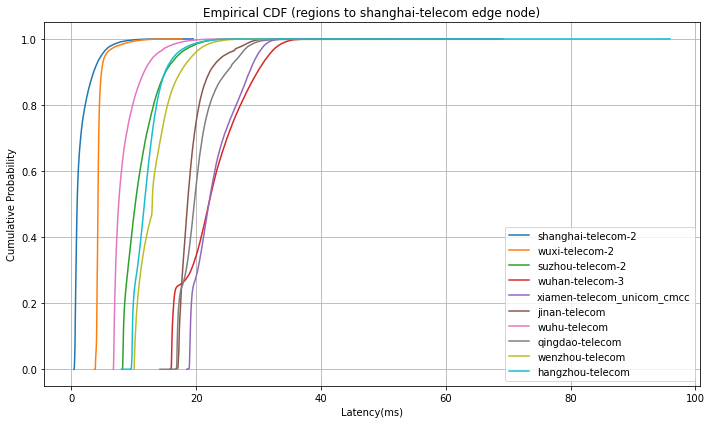

wuxi-telecom_unicom_cmcc	shanghai-telecom-2	min = 7.7697, max = 29.6093, std = 2.527619410414912, mean = 10.685484805408285
[ 7.7697  7.7697  7.776  ... 27.0931 27.8157 29.6093]
wuxi-telecom_unicom_cmcc	wuxi-telecom-2	min = 3.9978, max = 20.452, std = 0.9340700394314819, mean = 4.636474875420095
[ 3.9978  3.9978  4.0551 ... 16.9574 17.9441 20.452 ]
wuxi-telecom_unicom_cmcc	suzhou-telecom-2	min = 2.9585, max = 27.1459, std = 2.5877167823731004, mean = 8.527779550188395
[ 2.9585  3.6921  3.7876 ... 24.1635 25.8449 27.1459]
wuxi-telecom_unicom_cmcc	wuhan-telecom-3	min = 13.1111, max = 49.2202, std = 4.50690925629744, mean = 18.3930186334097
[13.1111 13.1111 13.4626 ... 37.4266 37.7937 49.2202]
wuxi-telecom_unicom_cmcc	xiamen-telecom_unicom_cmcc	min = 21.1647, max = 190.0984, std = 3.850977626186588, mean = 27.376319327685245
[ 21.1647  21.1647  21.1869 ... 189.283  190.0984 190.0984]
wuxi-telecom_unicom_cmcc	jinan-telecom	min = 18.324, max = 128.1055, std = 2.5041397045767635, mean = 20.9

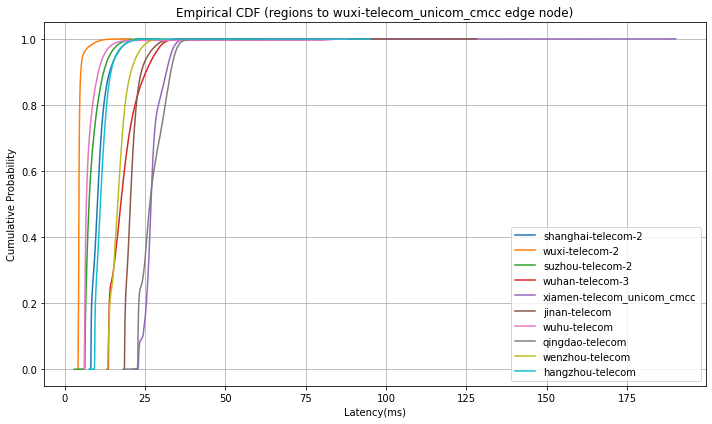

suzhou-telecom	shanghai-telecom-2	min = 5.9421, max = 25.1579, std = 2.2878574698571015, mean = 8.461137775863603
[ 5.9421  5.9421  5.9505 ... 23.3802 24.0335 25.1579]
suzhou-telecom	wuxi-telecom-2	min = 2.3785, max = 14.5052, std = 0.8198524582515838, mean = 2.950969249127961
[ 2.3785  2.3785  2.3994 ... 13.8605 14.1494 14.5052]
suzhou-telecom	suzhou-telecom-2	min = 0.2055, max = 16.2102, std = 1.6040724751840016, mean = 1.2738249202047576
[ 0.2055  0.2055  0.209  ... 15.3174 15.9973 16.2102]
suzhou-telecom	wuhan-telecom-3	min = 15.6711, max = 70.0847, std = 5.644802119211282, mean = 27.57694185643489
[15.6711 15.7998 15.7998 ... 44.0892 44.2288 70.0847]
suzhou-telecom	xiamen-telecom_unicom_cmcc	min = 22.8582, max = 95.5128, std = 4.194705506272595, mean = 27.917934234634885
[22.8582 22.8582 22.8929 ... 94.7708 95.1569 95.5128]
suzhou-telecom	jinan-telecom	min = 17.8727, max = 113.3285, std = 2.47143369128404, mean = 21.37972333803941
[ 17.8727  17.8727  17.9072 ...  51.0349  55.4551 

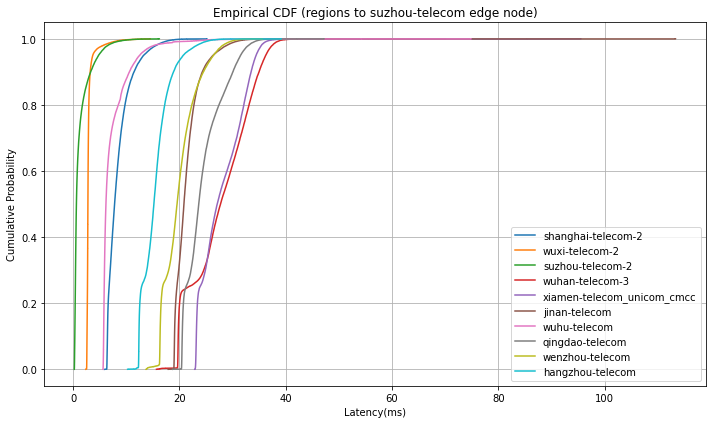

wuhan-telecom	shanghai-telecom-2	min = 15.3127, max = 37.6403, std = 3.9071019849811894, mean = 21.536175987489862
[15.3127 15.3127 15.3137 ... 36.8449 37.5889 37.6403]
wuhan-telecom	wuxi-telecom-2	min = 12.5394, max = 66.428, std = 2.090264429202806, mean = 15.342709258515137
[12.5394 12.5394 13.3815 ... 35.2999 36.5878 66.428 ]
wuhan-telecom	suzhou-telecom-2	min = 13.9545, max = 113.3458, std = 4.091232348846845, mean = 18.916766999618577
[ 13.9545  13.9545  14.0539 ...  35.213   39.8353 113.3458]
wuhan-telecom	wuhan-telecom-3	min = 2.1269, max = 22.9734, std = 1.554394874876184, mean = 2.9644273184503334
[ 2.1269  2.1269  2.1285 ... 20.3894 20.5477 22.9734]
wuhan-telecom	xiamen-telecom_unicom_cmcc	min = 17.0742, max = 343.4606, std = 5.71317023393471, mean = 29.825481032061784
[ 17.0742  17.0742  17.127  ... 117.1763 117.1763 343.4606]
wuhan-telecom	jinan-telecom	min = 30.8419, max = 144.5475, std = 7.219062373343128, mean = 44.8186698077648
[ 30.8419  30.8419  30.8681 ... 142.921  

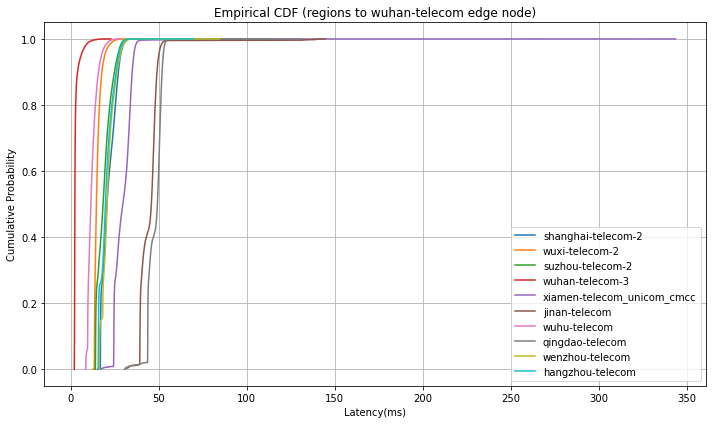

xiamen-telecom	shanghai-telecom-2	min = 17.9403, max = 39.8176, std = 4.060655084311196, mean = 23.657461073685674
[17.9403 17.9403 17.9868 ... 38.7835 39.6731 39.8176]
xiamen-telecom	wuxi-telecom-2	min = 18.6206, max = 56.2391, std = 4.5274888209233355, mean = 29.612592893565733
[18.6206 18.6206 18.6219 ... 48.2497 56.2391 56.2391]
xiamen-telecom	suzhou-telecom-2	min = 24.0824, max = 134.4614, std = 5.376521670145366, mean = 31.79995670100706
[ 24.0824  24.0824  24.1242 ... 112.933  134.2503 134.4614]
xiamen-telecom	wuhan-telecom-3	min = 17.6105, max = 408.632, std = 6.756592676619909, mean = 29.993891510591503
[ 17.6105  17.6105  17.6184 ... 118.2844 118.469  408.632 ]
xiamen-telecom	xiamen-telecom_unicom_cmcc	min = 0.3468, max = 15.1587, std = 0.7148108365481094, mean = 0.8570431847968545
[ 0.3468  0.3468  0.3535 ... 13.2004 14.2403 15.1587]
xiamen-telecom	jinan-telecom	min = 28.1479, max = 76.4937, std = 4.289751182931094, mean = 34.753375602766326
[28.1479 28.1479 28.1808 ... 73.2

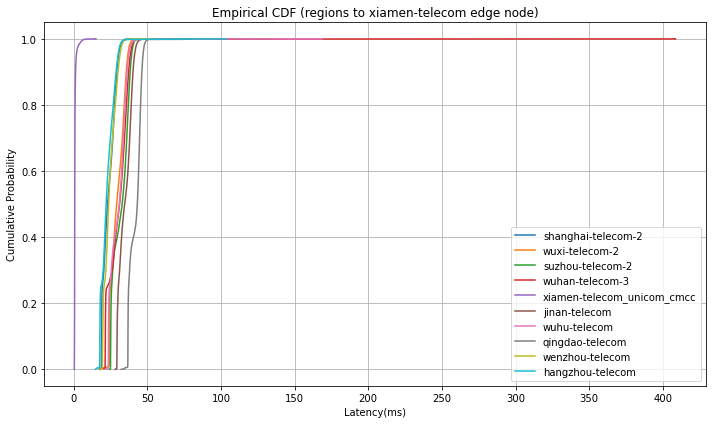

[[2.0, 5.0, 12.0, 23.0, 23.0, 20.0, 9.0, 21.0, 14.0, 13.0], [11.0, 5.0, 9.0, 19.0, 28.0, 21.0, 8.0, 28.0, 17.0, 12.0], [9.0, 3.0, 2.0, 28.0, 28.0, 22.0, 8.0, 25.0, 20.0, 16.0], [22.0, 16.0, 19.0, 3.0, 30.0, 45.0, 13.0, 48.0, 22.0, 21.0], [24.0, 30.0, 32.0, 30.0, 1.0, 35.0, 31.0, 42.0, 25.0, 23.0]]
[[2.355, 0.821, 8.494, 25.699, 12.765, 5.858, 5.452, 10.804, 8.894, 6.441], [6.389, 0.872, 6.696, 20.312, 14.83, 6.271, 27.501, 15.908, 7.933, 6.11], [5.234, 0.672, 2.573, 31.864, 17.596, 6.108, 8.21, 12.586, 10.334, 7.504], [15.265, 4.369, 16.738, 2.416, 32.64, 52.115, 7.275, 14.361, 12.48, 14.04], [16.489, 20.498, 28.907, 45.652, 0.511, 18.402, 26.094, 16.199, 15.083, 20.022]]


In [109]:
# Choose 5 "to_site_ids" -> each from a different city
# Choose 10 regions -> five from the same city (different from the 5 sites, and 5 more cities
# show the result of the whole dataset
dc_ids = ['shanghai-telecom', 'wuxi-telecom_unicom_cmcc', 'suzhou-telecom', 'wuhan-telecom', 'xiamen-telecom']
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']

latency_DC = []
variance_vals = []
num_site = 0


for dc_site_id in dc_ids:
    df_test = pd.read_csv(DATASET_LOCATION.rstrip("/") + "/split-rtt-files/{}.csv".format(dc_site_id))
    df_test = df_test[df_test["to_site_id"]==dc_site_id]
    df_test["biz_ts"] = pd.to_datetime(df_test['biz_ts'], unit='s', utc=True)
    df_test = df_test[df_test["rtt"] != 0] # Remove all rows with RTT = 0
    
    latency_DC.append([]) # create a new list for each new DC
    variance_vals.append([])
    plt.figure(figsize=(10, 6))
    for region_id in region_ids:
        df_region = df_test[df_test["from_site_id"]==region_id]
        
        if len(df_region) == 0:
            print("{}\t{} has no RTT values".format(dc_site_id, region_id))
        else:
            print("{}\t{}\tmin = {}, max = {}, std = {}, mean = {}".format(dc_site_id, region_id, df_region["rtt"].min(), df_region["rtt"].max(), df_region["rtt"].std(), df_region["rtt"].mean()))
            latency_DC[num_site].append(np.ceil((df_region["rtt"].mean())))
            variance_vals[num_site].append(round(df_region["rtt"].var(),3))
            
            rtt = np.array(df_region["rtt"])
            sorted_rtt = np.sort(rtt)
            print(sorted_rtt)
            ecdf = np.arange(1, len(sorted_rtt) + 1) / len(sorted_rtt)
            plt.step(sorted_rtt, ecdf, where='post', label="{}".format(region_id))
    
    num_site += 1
    plt.xlabel('Latency(ms)')
    plt.ylabel('Cumulative Probability')
    plt.title('Empirical CDF (regions to {} edge node)'.format(dc_site_id))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
print(latency_DC)
print(variance_vals)
    

shanghai-telecom	shanghai-telecom-2	min = 0.4766, max = 14.8685, std = 1.9109605018437568, mean = 1.979484988590138
[ 0.4766  0.4766  0.4768 ... 14.7036 14.7412 14.8685]
shanghai-telecom	wuxi-telecom-2	min = 4.0078, max = 16.7875, std = 0.7018665101436803, mean = 4.460238894402541
[ 4.0078  4.0078  4.0198 ... 14.9012 16.2445 16.7875]
shanghai-telecom	suzhou-telecom-2	min = 8.1668, max = 26.4841, std = 2.42913796102809, mean = 10.290078521825397
[ 8.1668  8.1668  8.2255 ... 25.7239 26.0604 26.4841]
shanghai-telecom	wuhan-telecom-3	min = 15.9354, max = 39.3276, std = 4.639889516033632, mean = 21.430017460317462
[15.9354 15.9354 15.9515 ... 38.5708 38.8566 39.3276]
shanghai-telecom	xiamen-telecom_unicom_cmcc	min = 18.8423, max = 36.3185, std = 2.9652428271445195, mean = 21.939314764834293
[18.8423 18.8423 18.8454 ... 35.4416 35.5194 36.3185]
shanghai-telecom	jinan-telecom	min = 16.6512, max = 35.2249, std = 3.0860023941890113, mean = 20.123728640873015
[16.6512 16.6512 16.6889 ... 33.3271

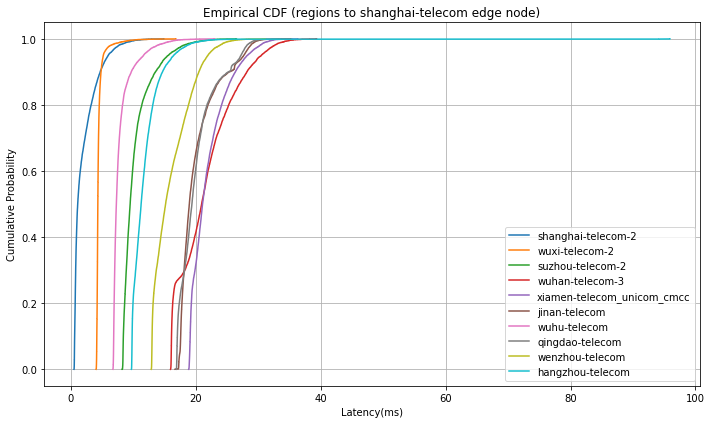

wuxi-telecom_unicom_cmcc	shanghai-telecom-2	min = 8.069, max = 27.8157, std = 3.085713668615957, mean = 11.047648040480206
[ 8.069   8.069   8.1058 ... 26.5076 27.0931 27.8157]
wuxi-telecom_unicom_cmcc	wuxi-telecom-2	min = 4.0551, max = 16.9574, std = 0.7263455390046095, mean = 4.582311186104218
[ 4.0551  4.0595  4.0595 ... 15.5162 16.2727 16.9574]
wuxi-telecom_unicom_cmcc	suzhou-telecom-2	min = 2.9585, max = 23.5828, std = 2.13208821896157, mean = 7.864681388888887
[ 2.9585  3.7876  3.7876 ... 22.0289 22.2695 23.5828]
wuxi-telecom_unicom_cmcc	wuhan-telecom-3	min = 13.5132, max = 37.7937, std = 4.128156423868237, mean = 17.62975
[13.5132 13.5132 13.5526 ... 35.9281 37.2975 37.7937]
wuxi-telecom_unicom_cmcc	xiamen-telecom_unicom_cmcc	min = 22.8305, max = 128.5391, std = 2.8872702409956243, mean = 26.853881470948114
[ 22.8305  22.8305  22.8449 ... 119.302  126.3045 128.5391]
wuxi-telecom_unicom_cmcc	jinan-telecom	min = 18.3692, max = 37.5889, std = 2.32394233464062, mean = 20.83149916666

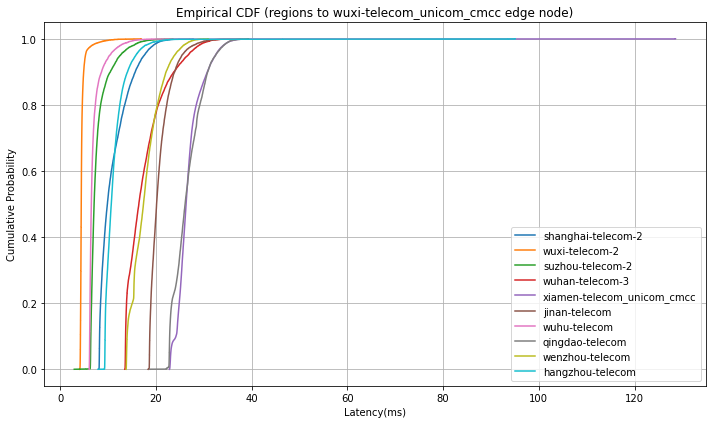

suzhou-telecom	shanghai-telecom-2	min = 6.3139, max = 25.1579, std = 2.793796285297435, mean = 8.978363319773788
[ 6.3139  6.3139  6.3179 ... 23.3802 24.0335 25.1579]
suzhou-telecom	wuxi-telecom-2	min = 2.5326, max = 13.5793, std = 0.6659816706854729, mean = 2.924641806451613
[ 2.5326  2.5326  2.5383 ... 13.0769 13.3725 13.5793]
suzhou-telecom	suzhou-telecom-2	min = 0.2608, max = 15.0459, std = 1.3458592374731897, mean = 1.0225805059523811
[ 0.2608  0.2608  0.2631 ... 13.2256 14.6312 15.0459]
suzhou-telecom	wuhan-telecom-3	min = 17.8683, max = 44.2288, std = 5.366788378235678, mean = 26.667716785714283
[17.8683 17.8683 19.6161 ... 43.4469 44.0892 44.2288]
suzhou-telecom	xiamen-telecom_unicom_cmcc	min = 23.0277, max = 40.3445, std = 3.763521951001591, mean = 27.14107636670305
[23.0277 23.0277 23.0337 ... 39.6508 39.7338 40.3445]
suzhou-telecom	jinan-telecom	min = 18.5242, max = 37.7473, std = 2.3222410449893514, mean = 21.299898898153664
[18.5242 18.5242 18.9824 ... 34.514  36.4158 37.7

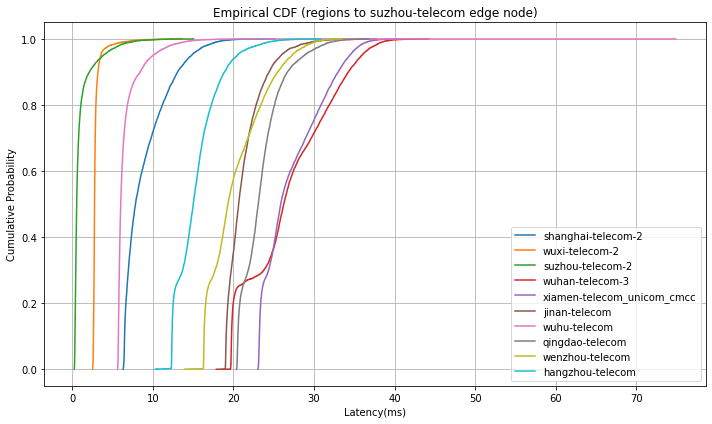

wuhan-telecom	shanghai-telecom-2	min = 16.9398, max = 37.5889, std = 4.206098687023196, mean = 21.42416046626984
[16.9398 16.9398 16.943  ... 35.9609 36.8449 37.5889]
wuhan-telecom	wuxi-telecom-2	min = 13.3844, max = 28.7642, std = 1.6717819864397978, mean = 14.961809559261464
[13.3844 13.3844 13.5137 ... 27.2007 27.3149 28.7642]
wuhan-telecom	suzhou-telecom-2	min = 14.1559, max = 35.2026, std = 3.3682093039177246, mean = 17.653663170949493
[14.1559 14.1559 14.1591 ... 32.7873 32.9007 35.2026]
wuhan-telecom	wuhan-telecom-3	min = 2.1623, max = 22.9734, std = 1.4489446568979136, mean = 2.873958263888889
[ 2.1623  2.1623  2.1637 ... 19.5304 20.3288 22.9734]
wuhan-telecom	xiamen-telecom_unicom_cmcc	min = 24.4025, max = 55.6066, std = 4.017347751549744, mean = 28.676780543704727
[24.4025 24.4025 24.4113 ... 47.5562 48.978  55.6066]
wuhan-telecom	jinan-telecom	min = 30.8796, max = 141.5437, std = 4.950002040861571, mean = 43.89423026785715
[ 30.8796  30.8796  30.9054 ...  55.1584 104.8306 14

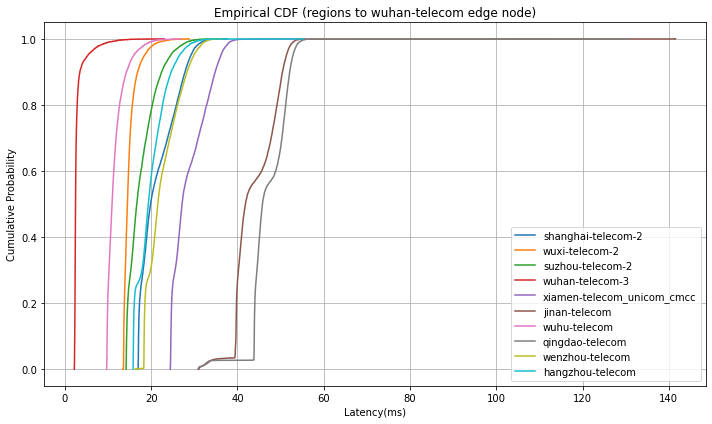

xiamen-telecom	shanghai-telecom-2	min = 18.7991, max = 39.8176, std = 4.288336774156655, mean = 23.329756746031748
[18.7991 18.7991 18.8    ... 38.0114 38.7835 39.8176]
xiamen-telecom	wuxi-telecom-2	min = 18.6554, max = 56.2391, std = 4.142760912779638, mean = 28.322522453841575
[18.6554 18.6554 18.7038 ... 41.9565 56.2391 56.2391]
xiamen-telecom	suzhou-telecom-2	min = 25.0777, max = 46.3912, std = 5.085422547962519, mean = 30.18509976188114
[25.0777 25.0777 25.102  ... 44.5943 44.737  46.3912]
xiamen-telecom	wuhan-telecom-3	min = 19.4268, max = 44.8828, std = 5.639317547022339, mean = 28.555633323412696
[19.4268 19.4268 20.4287 ... 43.607  44.0445 44.8828]
xiamen-telecom	xiamen-telecom_unicom_cmcc	min = 0.4116, max = 10.5078, std = 0.587972433748036, mean = 0.8558408712046042
[ 0.4116  0.4116  0.4136 ...  8.4859  9.1581 10.5078]
xiamen-telecom	jinan-telecom	min = 28.9169, max = 49.2637, std = 4.393905255266739, mean = 34.46115322420635
[28.9169 28.9169 29.6403 ... 48.0493 48.6293 49.2

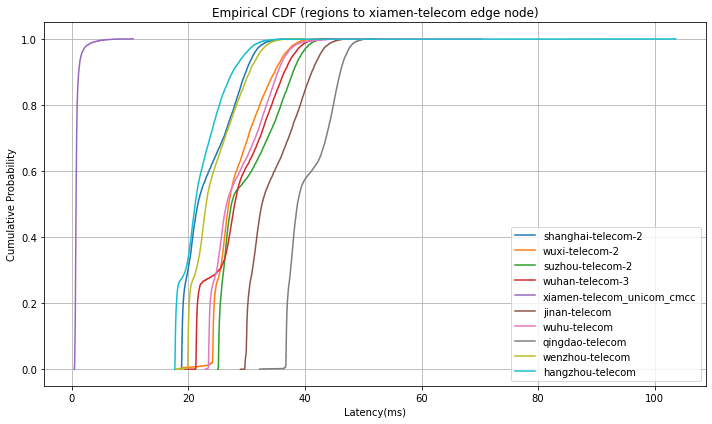

[[2.0, 5.0, 11.0, 22.0, 22.0, 21.0, 8.0, 21.0, 17.0, 12.0], [12.0, 5.0, 8.0, 18.0, 27.0, 21.0, 8.0, 27.0, 18.0, 12.0], [9.0, 3.0, 2.0, 27.0, 28.0, 22.0, 7.0, 24.0, 21.0, 16.0], [22.0, 15.0, 18.0, 3.0, 29.0, 44.0, 12.0, 48.0, 23.0, 20.0], [24.0, 29.0, 31.0, 29.0, 1.0, 35.0, 29.0, 41.0, 25.0, 23.0]]
[[3.652, 0.493, 5.901, 21.529, 8.793, 9.523, 2.908, 9.186, 9.317, 9.03], [9.522, 0.528, 4.546, 17.042, 8.336, 5.401, 2.837, 9.463, 9.783, 8.852], [7.805, 0.444, 1.811, 28.802, 14.164, 5.393, 3.023, 6.852, 12.74, 7.35], [17.691, 2.795, 11.345, 2.099, 16.139, 24.503, 4.533, 18.64, 14.609, 12.039], [18.39, 17.162, 25.862, 31.802, 0.346, 19.306, 22.169, 14.21, 16.265, 18.073]]
[[0.702, 4.205, 8.714, 16.58, 19.455, 17.916, 6.947, 17.712, 13.357, 10.11], [8.622, 4.323, 6.639, 14.114, 25.165, 19.099, 6.283, 24.135, 15.424, 9.694], [6.813, 2.707, 0.423, 20.576, 23.633, 19.508, 5.818, 21.168, 16.893, 12.847], [17.607, 13.874, 14.807, 2.349, 24.96, 39.928, 10.048, 44.188, 18.804, 16.5], [19.38, 24.721,

In [17]:
# Choose 5 "to_site_ids" -> each from a different city
# Choose 10 regions -> five from the same city (different from the 5 sites, and 5 more cities
# show the result of the dataset in 1 week
dc_ids = ['shanghai-telecom', 'wuxi-telecom_unicom_cmcc', 'suzhou-telecom', 'wuhan-telecom', 'xiamen-telecom']
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']

latency_DC = []
variance_vals = []
num_site = 0
q1 = []
median = []
q3 = []

start_time = pd.to_datetime('2020-05-31 16:00:00', utc=True)
end_time = pd.to_datetime('2020-06-07 16:00:00', utc=True)

for dc_site_id in dc_ids:
    df_test = pd.read_csv(DATASET_LOCATION.rstrip("/") + "/split-rtt-files/{}.csv".format(dc_site_id))
    df_test = df_test[df_test["to_site_id"]==dc_site_id]
    df_test["biz_ts"] = pd.to_datetime(df_test['biz_ts'], unit='s', utc=True)
    df_test = df_test[df_test["rtt"] != 0] # Remove all rows with RTT = 0
    
    latency_DC.append([]) # create a new list for each new DC
    variance_vals.append([])
    q1.append([])
    median.append([])
    q3.append([])
    plt.figure(figsize=(10, 6))
    for region_id in region_ids:
        df_region = df_test[df_test["from_site_id"]==region_id]
        df_region = df_region[(df_region["biz_ts"]>=start_time) & (df_region["biz_ts"]<=end_time)]
        
        if len(df_region) == 0:
            print("{}\t{} has no RTT values".format(dc_site_id, region_id))
        else:
            print("{}\t{}\tmin = {}, max = {}, std = {}, mean = {}".format(dc_site_id, region_id, df_region["rtt"].min(), df_region["rtt"].max(), df_region["rtt"].std(), df_region["rtt"].mean()))
            q1[num_site].append(round(df_region['rtt'].quantile(0.25),3))
            median[num_site].append(round(df_region['rtt'].median(),3))
            q3[num_site].append(round(df_region['rtt'].quantile(0.75),3))
            latency_DC[num_site].append(np.ceil((df_region["rtt"].mean())))
            variance_vals[num_site].append(round(df_region["rtt"].var(),3))
            
            rtt = np.array(df_region["rtt"])
            sorted_rtt = np.sort(rtt)
            print(sorted_rtt)
            ecdf = np.arange(1, len(sorted_rtt) + 1) / len(sorted_rtt)
            plt.step(sorted_rtt, ecdf, where='post', label="{}".format(region_id))
    
    num_site += 1
    plt.xlabel('Latency(ms)')
    plt.ylabel('Cumulative Probability')
    plt.title('Empirical CDF (regions to {} edge node)'.format(dc_site_id))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
print(latency_DC)
print(variance_vals)
print(q1)
print(median)
print(q3)
    

shanghai-telecom	shanghai-telecom-2	min = 0.4163, max = 19.499, std = 1.5344710445684548, mean = 1.5746451636801408
[ 0.4163  0.4163  0.4179 ... 15.0263 16.2082 19.499 ] 43194
shanghai-telecom	shanghai-telecom-2	min = 0.4352, max = 15.5205, std = 1.535295881268942, mean = 1.680158772033878
[ 0.4352  0.4352  0.4485 ... 14.0751 14.9207 15.5205] 42151


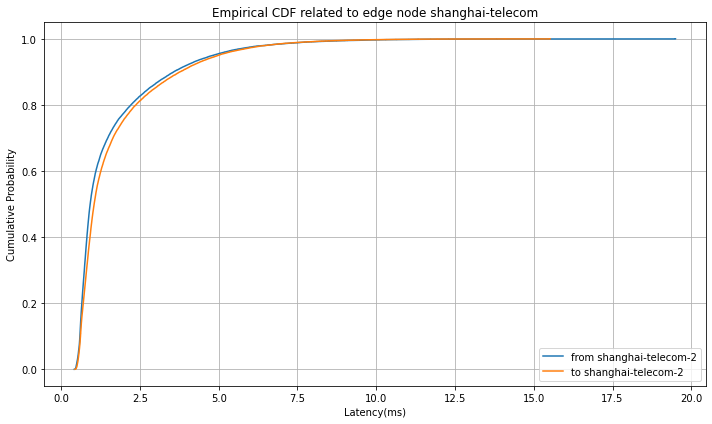

shanghai-telecom	wuxi-telecom-2	min = 3.758, max = 17.6693, std = 0.9062108241990547, mean = 4.454551344276212
[ 3.758   3.7707  3.7707 ... 16.7875 16.8762 17.6693] 42402
shanghai-telecom	wuxi-telecom-2	min = 3.7527, max = 21.4487, std = 1.9152666247700174, mean = 5.807104306053941
[ 3.7527  3.7527  3.8335 ... 19.5594 19.7072 21.4487] 43195


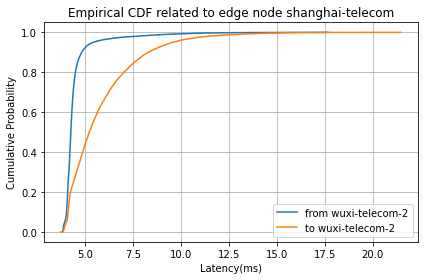

shanghai-telecom	suzhou-telecom-2	min = 8.1158, max = 30.7188, std = 2.9144119979681147, mean = 11.096393131308453
[ 8.1158  8.1158  8.1226 ... 28.4565 28.9862 30.7188] 43196
shanghai-telecom	suzhou-telecom-2	min = 8.1104, max = 42.2814, std = 2.5153357021664244, mean = 11.115881372844079
[ 8.1104  8.1104  8.1281 ... 24.5971 29.9084 42.2814] 43195


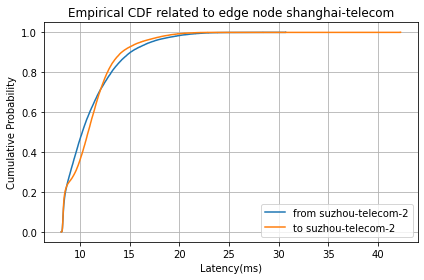

shanghai-telecom	wuhan-telecom-3	min = 15.785, max = 59.806, std = 5.069458911706637, mean = 22.421643695748813
[15.785  15.785  15.8015 ... 39.3016 39.3276 59.806 ] 42741
shanghai-telecom	wuhan-telecom-3	min = 15.6538, max = 60.2738, std = 3.725749911837027, mean = 20.458207109237797
[15.6538 15.6538 15.6603 ... 33.3855 34.1439 60.2738] 42705


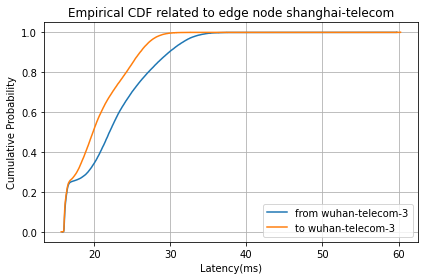

shanghai-telecom	xiamen-telecom_unicom_cmcc	min = 18.4839, max = 36.3185, std = 3.5728243641704682, mean = 22.892513964902534
[18.4839 18.4839 18.5157 ... 35.5817 35.9053 36.3185] 43194
shanghai-telecom	xiamen-telecom_unicom_cmcc	min = 18.5109, max = 38.5267, std = 4.016397110156464, mean = 23.881922456822707
[18.5109 18.5109 18.5127 ... 36.662  37.498  38.5267] 43194


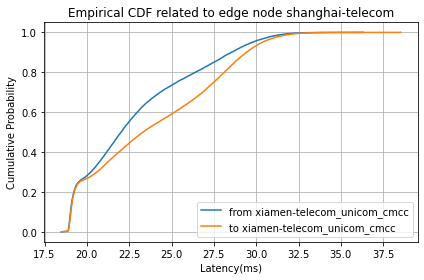

shanghai-telecom	jinan-telecom	min = 16.6512, max = 68.4678, std = 2.420239581248889, mean = 19.31341396420509
[16.6512 16.6512 16.6889 ... 52.9764 53.5854 68.4678] 42967
shanghai-telecom	jinan-telecom	min = 16.6872, max = 63.4951, std = 3.9208317872298664, mean = 22.0510775967603
[16.6872 16.6872 16.7454 ... 53.0977 63.4951 63.4951] 42967


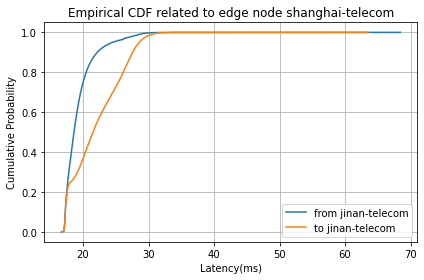

shanghai-telecom	wuhu-telecom	min = 6.694, max = 30.9139, std = 2.3348456718364674, mean = 8.541518017406768
[ 6.694   6.694   6.7036 ... 28.0582 29.4517 30.9139] 42742
shanghai-telecom	wuhu-telecom	min = 6.6435, max = 30.5699, std = 2.47963638759876, mean = 9.366039114732848
[ 6.6435  6.6435  6.7009 ... 28.8612 29.3877 30.5699] 43196


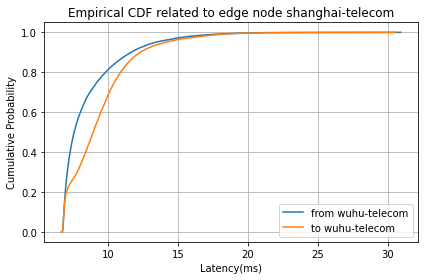

shanghai-telecom	qingdao-telecom	min = 14.1865, max = 69.2566, std = 3.286911570351221, mean = 20.28542338394591
[14.1865 14.3656 16.7978 ... 55.582  55.7305 69.2566] 42743
shanghai-telecom	qingdao-telecom	min = 16.1856, max = 68.7598, std = 4.019710161037544, mean = 21.676701356607094
[16.1856 16.8051 16.8051 ... 58.3822 58.7268 68.7598] 43196


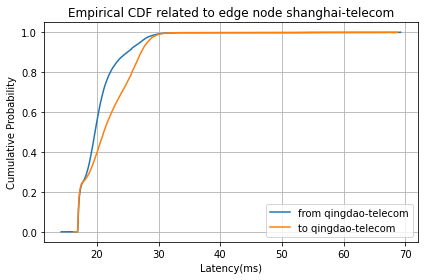

shanghai-telecom	wenzhou-telecom	min = 10.0177, max = 31.1036, std = 2.9822016350891243, mean = 13.347402495543673
[10.0177 10.0177 10.0265 ... 29.6964 30.1387 31.1036] 43197
shanghai-telecom	wenzhou-telecom	min = 9.731, max = 28.7647, std = 3.082684729006158, mean = 14.842805262416347
[ 9.731   9.9571 10.0103 ... 28.6626 28.6658 28.7647] 28390


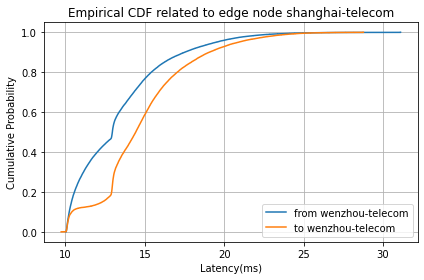

shanghai-telecom	hangzhou-telecom	min = 8.0075, max = 95.9314, std = 2.537886756847094, mean = 12.137080012502315
[ 8.0075  8.1493  8.6915 ... 95.2466 95.2466 95.9314] 43192
shanghai-telecom	hangzhou-telecom	min = 7.1678, max = 94.6116, std = 2.900342235470857, mean = 12.912376559905102
[ 7.1678  7.1678  9.1208 ... 93.7958 93.7958 94.6116] 42150


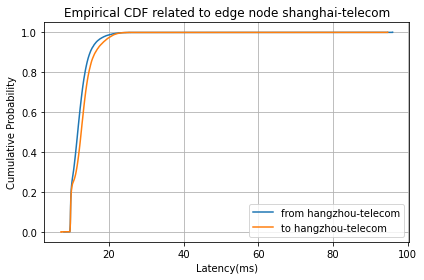

wuxi-telecom_unicom_cmcc	shanghai-telecom-2	min = 7.7697, max = 29.6093, std = 2.527619410414912, mean = 10.685484805408285
[ 7.7697  7.7697  7.776  ... 27.0931 27.8157 29.6093] 43193
wuxi-telecom_unicom_cmcc	shanghai-telecom-2	min = 7.6334, max = 23.8116, std = 1.2218204294112038, mean = 8.839804336150017
[ 7.6334  7.6334  7.6712 ... 23.2283 23.245  23.8116] 43195


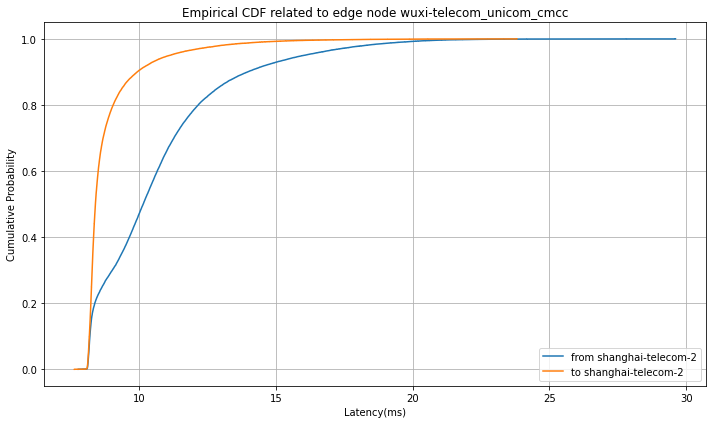

wuxi-telecom_unicom_cmcc	wuxi-telecom-2	min = 3.9978, max = 20.452, std = 0.9340700394314819, mean = 4.636474875420095
[ 3.9978  3.9978  4.0551 ... 16.9574 17.9441 20.452 ] 43145
wuxi-telecom_unicom_cmcc	wuxi-telecom-2	min = 4.0153, max = 20.4282, std = 0.9488245081203694, mean = 4.609282737227122
[ 4.0153  4.0993  4.101  ... 17.9776 19.3854 20.4282] 43197


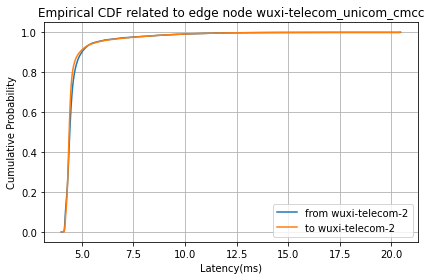

wuxi-telecom_unicom_cmcc	suzhou-telecom-2	min = 2.9585, max = 27.1459, std = 2.5877167823731004, mean = 8.527779550188395
[ 2.9585  3.6921  3.7876 ... 24.1635 25.8449 27.1459] 42729
wuxi-telecom_unicom_cmcc	suzhou-telecom-2	min = 2.6536, max = 21.4197, std = 1.0832934360605986, mean = 6.813645654690249
[ 2.6536  2.6536  2.7766 ... 20.2596 20.4464 21.4197] 43196


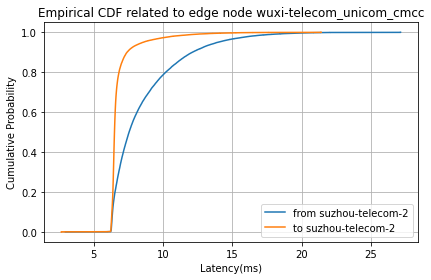

wuxi-telecom_unicom_cmcc	wuhan-telecom-3	min = 13.1111, max = 49.2202, std = 4.50690925629744, mean = 18.3930186334097
[13.1111 13.1111 13.4626 ... 37.4266 37.7937 49.2202] 42778
wuxi-telecom_unicom_cmcc	wuhan-telecom-3	min = 13.0247, max = 46.5908, std = 2.072306229896469, mean = 15.332891254488588
[13.0247 13.0247 13.4423 ... 32.9474 35.6011 46.5908] 43165


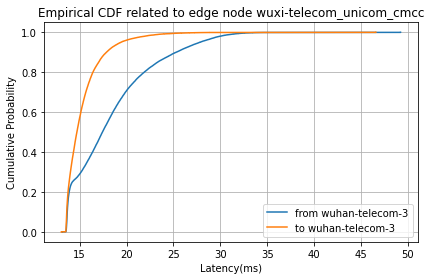

wuxi-telecom_unicom_cmcc	xiamen-telecom_unicom_cmcc	min = 21.1647, max = 190.0984, std = 3.850977626186588, mean = 27.376319327685245
[ 21.1647  21.1647  21.1869 ... 189.283  190.0984 190.0984] 128303
wuxi-telecom_unicom_cmcc	xiamen-telecom_unicom_cmcc	min = 21.2232, max = 188.009, std = 3.90878279230064, mean = 28.69270080619071
[ 21.2232  21.2232  21.2319 ... 186.4096 187.036  188.009 ] 114365


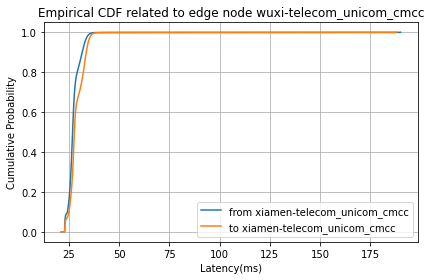

wuxi-telecom_unicom_cmcc	jinan-telecom	min = 18.324, max = 128.1055, std = 2.5041397045767635, mean = 20.961811487027358
[ 18.324   18.324   18.3608 ...  48.3608  52.4783 128.1055] 42474
wuxi-telecom_unicom_cmcc	jinan-telecom	min = 18.3414, max = 127.9209, std = 3.3910799014865534, mean = 22.029085752187672
[ 18.3414  18.3414  18.3687 ...  58.9808 103.9929 127.9209] 42968


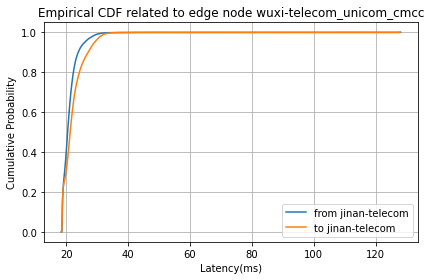

wuxi-telecom_unicom_cmcc	wuhu-telecom	min = 6.0159, max = 87.8791, std = 5.244155484307942, mean = 7.906614481065919
[ 6.0159  6.0159  6.0296 ... 87.7896 87.8105 87.8791] 42780
wuxi-telecom_unicom_cmcc	wuhu-telecom	min = 6.0212, max = 87.5202, std = 4.4318868120552, mean = 6.882991000352237
[ 6.0212  6.0235  6.0261 ... 87.4104 87.4223 87.5202] 28390


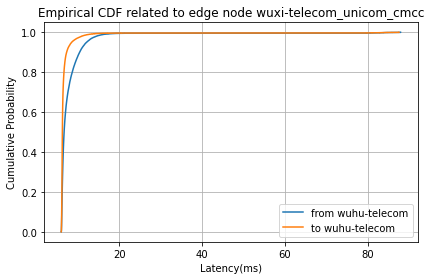

wuxi-telecom_unicom_cmcc	qingdao-telecom	min = 18.1337, max = 61.683, std = 3.988439721089955, mean = 27.336353548387095
[18.1337 18.1337 18.1739 ... 61.145  61.2825 61.683 ] 42780
wuxi-telecom_unicom_cmcc	qingdao-telecom	min = 18.0024, max = 65.1545, std = 4.39667746137592, mean = 27.903571248003338
[18.0024 18.0024 18.028  ... 63.6374 64.2581 65.1545] 43197


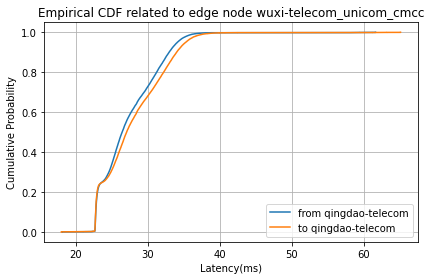

wuxi-telecom_unicom_cmcc	wenzhou-telecom	min = 13.033, max = 31.4487, std = 2.816553083377278, mean = 16.869459247169942
[13.033  13.033  13.0369 ... 31.162  31.3079 31.4487] 43197
wuxi-telecom_unicom_cmcc	wenzhou-telecom	min = 13.007, max = 33.5698, std = 2.0925282849600007, mean = 15.586255962272098
[13.007  13.007  13.01   ... 30.4461 31.9123 33.5698] 42727


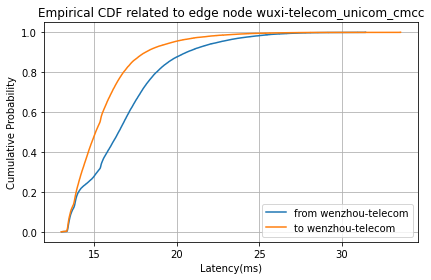

wuxi-telecom_unicom_cmcc	hangzhou-telecom	min = 7.5255, max = 95.0587, std = 2.471793271802716, mean = 11.589491022402681
[ 7.5255  7.5255  7.6204 ... 94.3356 94.5065 95.0587] 42361
wuxi-telecom_unicom_cmcc	hangzhou-telecom	min = 7.8124, max = 94.7811, std = 1.6897853339085738, mean = 10.183313417909066
[ 7.8124  7.9852  7.9852 ... 94.6265 94.693  94.7811] 43196


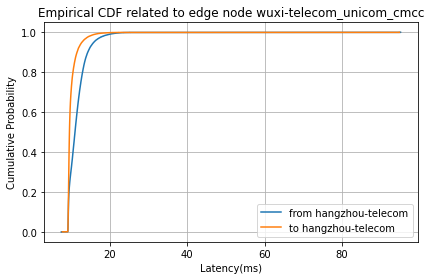

suzhou-telecom	shanghai-telecom-2	min = 5.9421, max = 25.1579, std = 2.2878574698571015, mean = 8.461137775863603
[ 5.9421  5.9421  5.9505 ... 23.3802 24.0335 25.1579] 33667
suzhou-telecom	shanghai-telecom-2	min = 5.8951, max = 21.4347, std = 1.5068030910873298, mean = 7.729143199409063
[ 5.8951  5.8951  5.9324 ... 19.3608 21.1595 21.4347] 31137


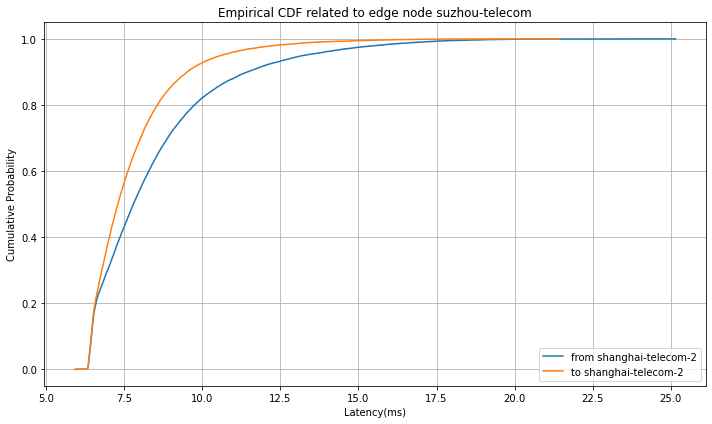

suzhou-telecom	wuxi-telecom-2	min = 2.3785, max = 14.5052, std = 0.8198524582515838, mean = 2.950969249127961
[ 2.3785  2.3785  2.3994 ... 13.8605 14.1494 14.5052] 32682
suzhou-telecom	wuxi-telecom-2	min = 2.383, max = 15.8316, std = 1.1113310533674394, mean = 3.3572862194103665
[ 2.383   2.383   2.3895 ... 14.6036 14.642  15.8316] 31138


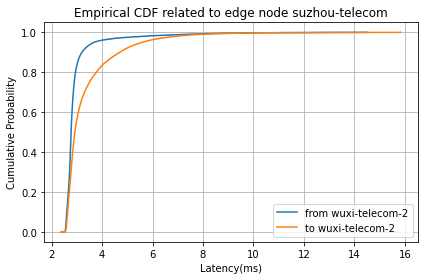

suzhou-telecom	suzhou-telecom-2	min = 0.2055, max = 16.2102, std = 1.6040724751840016, mean = 1.2738249202047576
[ 0.2055  0.2055  0.209  ... 15.3174 15.9973 16.2102] 33210
suzhou-telecom	suzhou-telecom-2	min = 0.1877, max = 10.7762, std = 0.8964877231896373, mean = 0.8166844044063333
[ 0.1877  0.1877  0.189  ...  8.7317  8.8534 10.7762] 31137


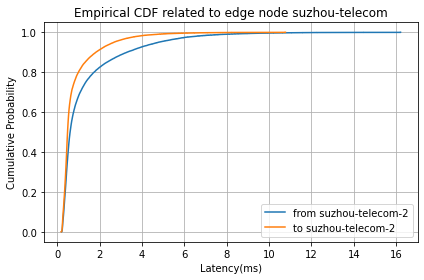

suzhou-telecom	wuhan-telecom-3	min = 15.6711, max = 70.0847, std = 5.644802119211282, mean = 27.57694185643489
[15.6711 15.7998 15.7998 ... 44.0892 44.2288 70.0847] 32891
suzhou-telecom	wuhan-telecom-3	min = 15.5739, max = 38.3549, std = 3.4922799319492595, mean = 23.452131060533002
[15.5739 15.5739 15.6113 ... 37.1937 38.0071 38.3549] 31107


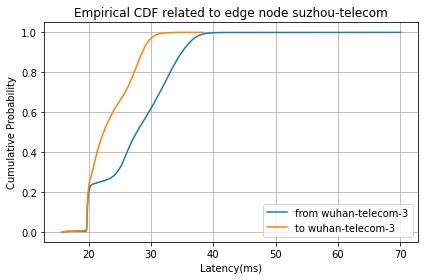

suzhou-telecom	xiamen-telecom_unicom_cmcc	min = 22.8582, max = 95.5128, std = 4.194705506272595, mean = 27.917934234634885
[22.8582 22.8582 22.8929 ... 94.7708 95.1569 95.5128] 33729
suzhou-telecom	xiamen-telecom_unicom_cmcc	min = 22.8798, max = 95.3706, std = 3.890906321041825, mean = 27.121007385730213
[22.8798 22.9224 22.9254 ... 90.0958 94.6039 95.3706] 21528


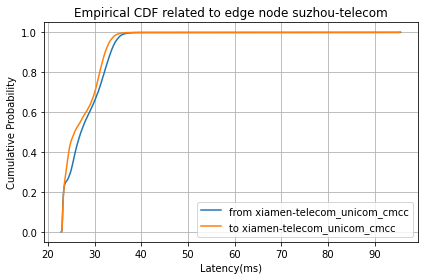

suzhou-telecom	jinan-telecom	min = 17.8727, max = 113.3285, std = 2.47143369128404, mean = 21.37972333803941
[ 17.8727  17.8727  17.9072 ...  51.0349  55.4551 113.3285] 32582
suzhou-telecom	jinan-telecom	min = 17.9275, max = 112.698, std = 3.4869354934334233, mean = 22.724054497508575
[ 17.9275  17.9275  18.0329 ...  49.3875  57.5286 112.698 ] 30906


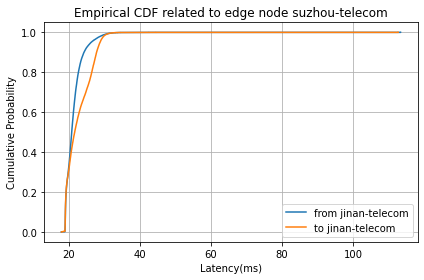

suzhou-telecom	wuhu-telecom	min = 5.5945, max = 74.8524, std = 2.8652290584338496, mean = 7.329407976924006
[ 5.5945  5.5945  5.5957 ... 54.9507 56.8819 74.8524] 33108
suzhou-telecom	wuhu-telecom	min = 5.5684, max = 73.93, std = 2.1612680148917134, mean = 6.984688312894835
[ 5.5684  5.5803  5.5883 ... 53.7206 54.9478 73.93  ] 21528


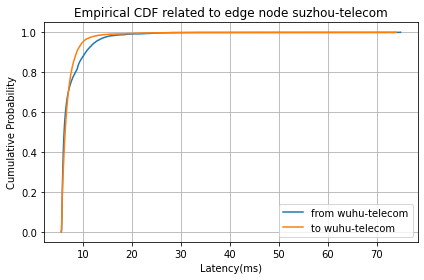

suzhou-telecom	qingdao-telecom	min = 18.6847, max = 47.1981, std = 3.547722463966491, mean = 24.408793496209448
[18.6847 18.6847 18.69   ... 42.056  43.826  47.1981] 32581
suzhou-telecom	qingdao-telecom	min = 18.6332, max = 61.5568, std = 3.5455118561462924, mean = 24.35718933136361
[18.6332 18.6332 18.6526 ... 41.7742 43.912  61.5568] 31138


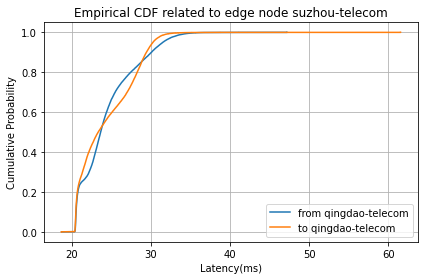

suzhou-telecom	wenzhou-telecom	min = 13.6941, max = 35.5814, std = 3.2146587090935, mean = 19.947505477855476
[13.6941 13.6941 13.7998 ... 33.6848 35.0762 35.5814] 33462
suzhou-telecom	wenzhou-telecom	min = 12.8946, max = 31.9522, std = 3.071773149525367, mean = 19.33671808459389
[12.8946 12.8946 12.9004 ... 31.1199 31.1372 31.9522] 31137


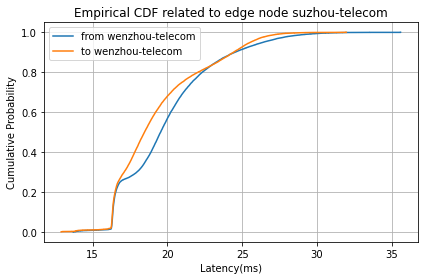

suzhou-telecom	hangzhou-telecom	min = 10.2499, max = 39.1355, std = 2.739419064268395, mean = 15.446386985970005
[10.2499 10.2808 10.2808 ... 30.5368 30.8719 39.1355] 22737
suzhou-telecom	hangzhou-telecom	min = 10.3807, max = 72.7497, std = 2.3997655266319686, mean = 14.695285972124092
[10.3807 10.3807 10.4335 ... 37.5976 41.1221 72.7497] 31138


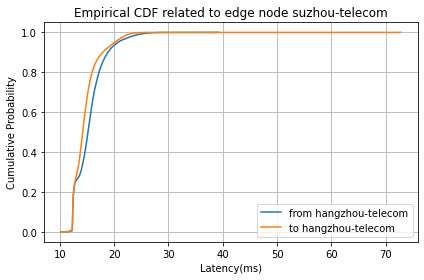

wuhan-telecom	shanghai-telecom-2	min = 15.3127, max = 37.6403, std = 3.9071019849811894, mean = 21.536175987489862
[15.3127 15.3127 15.3137 ... 36.8449 37.5889 37.6403] 43165
wuhan-telecom	shanghai-telecom-2	min = 15.2875, max = 74.2432, std = 5.872056397569375, mean = 24.778214276007493
[15.2875 15.2875 15.306  ... 44.5196 74.2432 74.2432] 42680


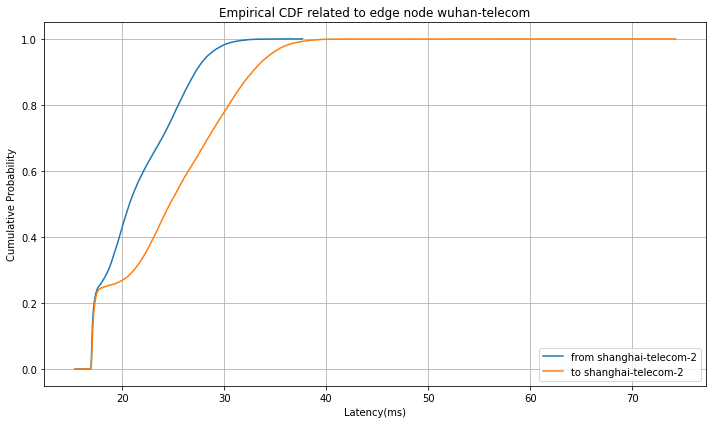

wuhan-telecom	wuxi-telecom-2	min = 12.5394, max = 66.428, std = 2.090264429202806, mean = 15.342709258515137
[12.5394 12.5394 13.3815 ... 35.2999 36.5878 66.428 ] 42307
wuhan-telecom	wuxi-telecom-2	min = 12.69, max = 65.8491, std = 5.132118433265583, mean = 19.45745273745862
[12.69   12.69   13.4236 ... 39.681  40.2885 65.8491] 43197


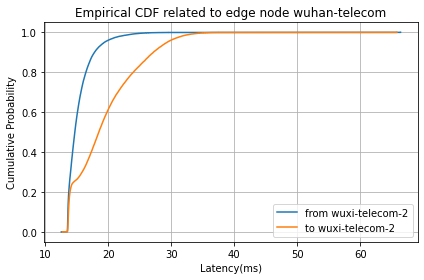

wuhan-telecom	suzhou-telecom-2	min = 13.9545, max = 113.3458, std = 4.091232348846845, mean = 18.916766999618577
[ 13.9545  13.9545  14.0539 ...  35.213   39.8353 113.3458] 41948
wuhan-telecom	suzhou-telecom-2	min = 14.0423, max = 124.8295, std = 5.311744332370227, mean = 20.392485834336515
[ 14.0423  14.0423  14.0539 ...  42.0452 124.8295 124.8295] 43196


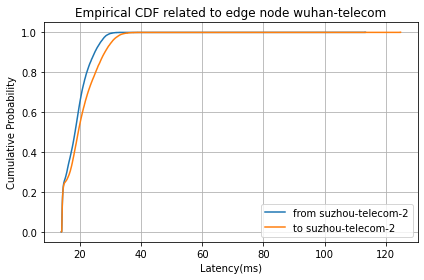

wuhan-telecom	wuhan-telecom-3	min = 2.1269, max = 22.9734, std = 1.554394874876184, mean = 2.9644273184503334
[ 2.1269  2.1269  2.1285 ... 20.3894 20.5477 22.9734] 42151
wuhan-telecom	wuhan-telecom-3	min = 2.1271, max = 24.9951, std = 2.1429143505972896, mean = 3.3281922015989522
[ 2.1271  2.1271  2.1283 ... 22.9541 24.1076 24.9951] 42778


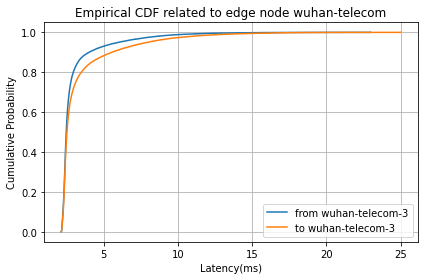

wuhan-telecom	xiamen-telecom_unicom_cmcc	min = 17.0742, max = 343.4606, std = 5.71317023393471, mean = 29.825481032061784
[ 17.0742  17.0742  17.127  ... 117.1763 117.1763 343.4606] 42730
wuhan-telecom	xiamen-telecom_unicom_cmcc	min = 17.1349, max = 117.94, std = 7.537080503204262, mean = 34.17849185823089
[ 17.1349  17.1349  17.1479 ... 116.1829 116.4098 117.94  ] 43197


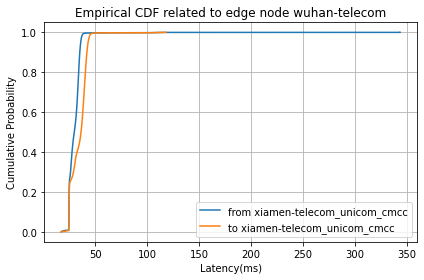

wuhan-telecom	jinan-telecom	min = 30.8419, max = 144.5475, std = 7.219062373343128, mean = 44.8186698077648
[ 30.8419  30.8419  30.8681 ... 142.921  144.5475 144.5475] 42448
wuhan-telecom	jinan-telecom	min = 30.8725, max = 141.2217, std = 7.72743406847692, mean = 46.37394762270474
[ 30.8725  30.8725  30.8736 ... 141.0565 141.1961 141.2217] 42969


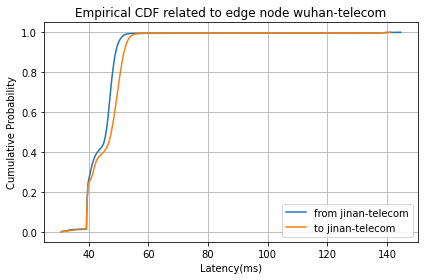

wuhan-telecom	wuhu-telecom	min = 8.5892, max = 28.2888, std = 2.6972658992494973, mean = 12.210652437780254
[ 8.5892  8.5954  8.5976 ... 27.6072 28.0865 28.2888] 42149
wuhan-telecom	wuhu-telecom	min = 8.5944, max = 37.0873, std = 4.068690228089131, mean = 13.093973263728126
[ 8.5944  8.5944  8.6027 ... 34.3683 36.2344 37.0873] 43196


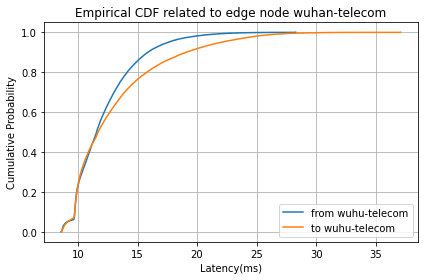

wuhan-telecom	qingdao-telecom	min = 31.0337, max = 130.628, std = 3.7895799725910813, mean = 47.97528897271649
[ 31.0337  31.0337  31.0421 ...  75.7445 130.628  130.628 ] 42150
wuhan-telecom	qingdao-telecom	min = 31.0321, max = 108.6213, std = 4.582751678662984, mean = 49.3032474102455
[ 31.0321  31.0321  31.0498 ...  74.3596  74.5436 108.6213] 42282


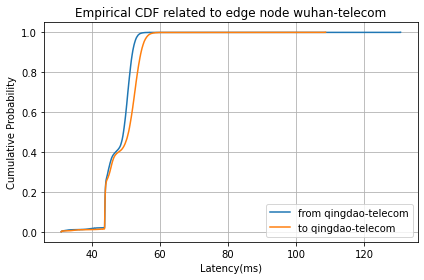

wuhan-telecom	wenzhou-telecom	min = 16.2732, max = 84.6371, std = 3.5327547039783935, mean = 21.239916318640613
[16.2732 16.2732 16.2755 ... 35.5483 36.4191 84.6371] 43196
wuhan-telecom	wenzhou-telecom	min = 16.2734, max = 47.5899, std = 5.917315350580245, mean = 24.950706498442074
[16.2734 16.2734 16.2811 ... 44.3115 44.5344 47.5899] 42364


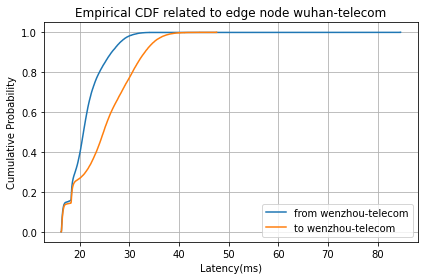

wuhan-telecom	hangzhou-telecom	min = 15.562, max = 69.7529, std = 3.7469686835729057, mean = 20.293293369295952
[15.562  15.562  15.5701 ... 64.8033 69.7529 69.7529] 43193
wuhan-telecom	hangzhou-telecom	min = 15.6036, max = 67.6284, std = 5.6403081495143725, mean = 22.991768361489257
[15.6036 15.6036 15.6067 ... 44.0069 54.523  67.6284] 42679


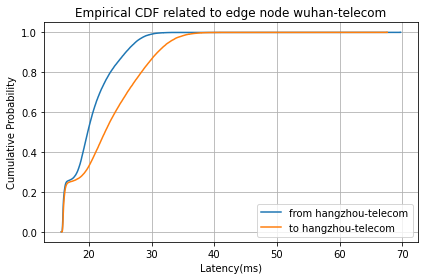

xiamen-telecom	shanghai-telecom-2	min = 17.9403, max = 39.8176, std = 4.060655084311196, mean = 23.657461073685674
[17.9403 17.9403 17.9868 ... 38.7835 39.6731 39.8176] 43197
xiamen-telecom	shanghai-telecom-2	min = 17.964, max = 42.9168, std = 4.479681573424821, mean = 23.924517132009072
[17.964  17.964  17.9744 ... 40.5197 40.9736 42.9168] 43194


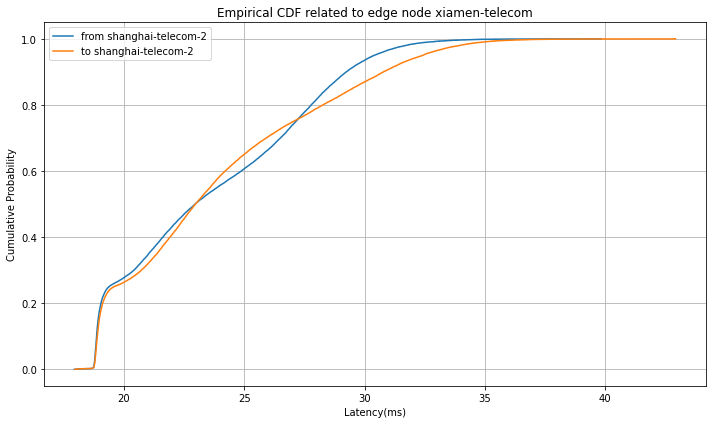

xiamen-telecom	wuxi-telecom-2	min = 18.6206, max = 56.2391, std = 4.5274888209233355, mean = 29.612592893565733
[18.6206 18.6206 18.6219 ... 48.2497 56.2391 56.2391] 43144
xiamen-telecom	wuxi-telecom-2	min = 18.631, max = 48.1367, std = 5.318907376956861, mean = 30.884900782461745
[18.631  18.631  18.6531 ... 45.8002 45.9008 48.1367] 43197


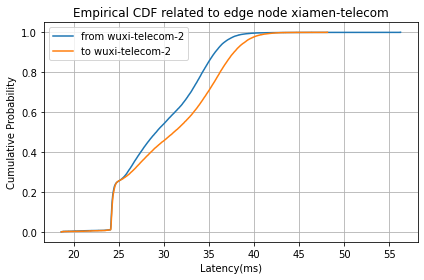

xiamen-telecom	suzhou-telecom-2	min = 24.0824, max = 134.4614, std = 5.376521670145366, mean = 31.79995670100706
[ 24.0824  24.0824  24.1242 ... 112.933  134.2503 134.4614] 43195
xiamen-telecom	suzhou-telecom-2	min = 24.1168, max = 134.5889, std = 5.408052667088288, mean = 31.973880143686234
[ 24.1168  24.1168  24.1949 ... 134.1865 134.2543 134.5889] 42732


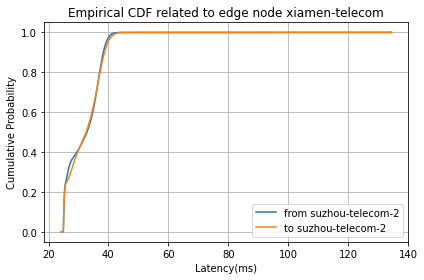

xiamen-telecom	wuhan-telecom-3	min = 17.6105, max = 408.632, std = 6.756592676619909, mean = 29.993891510591503
[ 17.6105  17.6105  17.6184 ... 118.2844 118.469  408.632 ] 43195
xiamen-telecom	wuhan-telecom-3	min = 17.5903, max = 118.1797, std = 5.352911139576847, mean = 27.10765406509793
[ 17.5903  17.631   17.6482 ... 117.8316 118.1254 118.1797] 28388


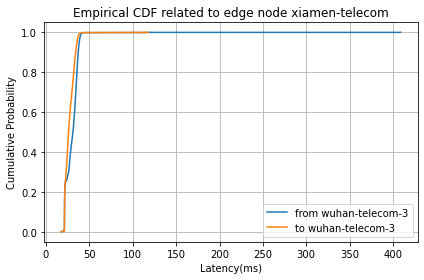

xiamen-telecom	xiamen-telecom_unicom_cmcc	min = 0.3468, max = 15.1587, std = 0.7148108365481094, mean = 0.8570431847968545
[ 0.3468  0.3468  0.3535 ... 13.2004 14.2403 15.1587] 42728
xiamen-telecom	xiamen-telecom_unicom_cmcc	min = 0.3642, max = 15.5067, std = 1.158587600397669, mean = 1.1161806334519573
[ 0.3642  0.3642  0.365  ... 14.799  15.3801 15.5067] 42150


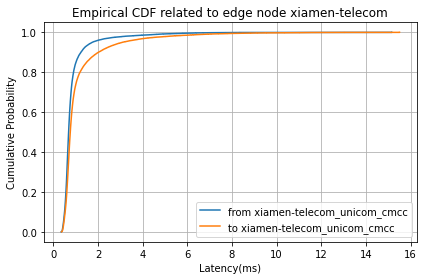

xiamen-telecom	jinan-telecom	min = 28.1479, max = 76.4937, std = 4.289751182931094, mean = 34.753375602766326
[28.1479 28.1479 28.1808 ... 73.2218 75.4436 76.4937] 42222
xiamen-telecom	jinan-telecom	min = 28.0946, max = 76.8768, std = 5.3096539856458875, mean = 36.51482558981959
[28.0946 28.0946 28.1168 ... 71.812  75.9509 76.8768] 42513


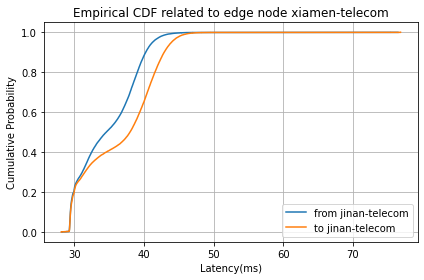

xiamen-telecom	wuhu-telecom	min = 21.3471, max = 168.7015, std = 5.108264451756939, mean = 30.005053320832467
[ 21.3471  21.3471  22.7303 ... 128.2318 141.4761 168.7015] 43197
xiamen-telecom	wuhu-telecom	min = 22.7348, max = 297.1842, std = 5.57119889185376, mean = 30.347901228915088
[ 22.7348  22.7348  22.7469 ... 129.0527 141.6336 297.1842] 42151


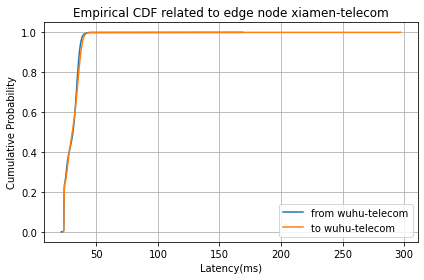

xiamen-telecom	qingdao-telecom	min = 32.1978, max = 80.6556, std = 4.024777604826964, mean = 41.82994246689508
[32.1978 32.1978 32.2412 ... 77.8117 77.9798 80.6556] 43196
xiamen-telecom	qingdao-telecom	min = 32.2895, max = 79.5357, std = 4.840683320791649, mean = 42.936741007477366
[32.2895 32.2895 32.3803 ... 79.3227 79.4272 79.5357] 43197


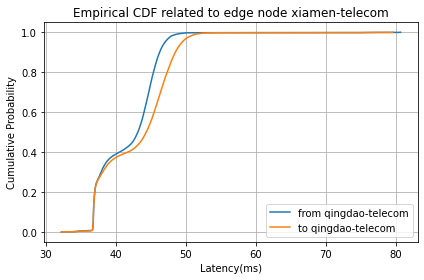

xiamen-telecom	wenzhou-telecom	min = 17.8559, max = 52.2808, std = 3.883747212964684, mean = 24.33395936316454
[17.8559 17.8559 17.8888 ... 42.5393 46.5641 52.2808] 42774
xiamen-telecom	wenzhou-telecom	min = 17.8911, max = 55.1698, std = 4.6012700332592, mean = 25.073294859605163
[17.8911 17.8911 17.9233 ... 50.4453 54.6133 55.1698] 42701


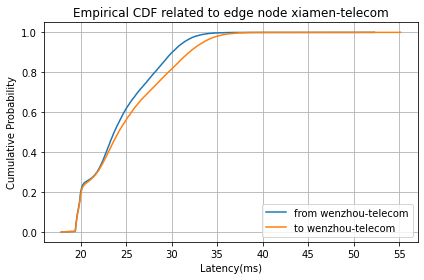

xiamen-telecom	hangzhou-telecom	min = 14.7816, max = 103.5702, std = 4.474637070673461, mean = 22.71888209746498
[ 14.7816  14.7816  14.7847 ... 103.0181 103.3789 103.5702] 43195
xiamen-telecom	hangzhou-telecom	min = 14.781, max = 104.1747, std = 4.6795124623724, mean = 22.424899763872492
[ 14.781   14.781   14.7976 ... 102.7288 102.7288 104.1747] 43197


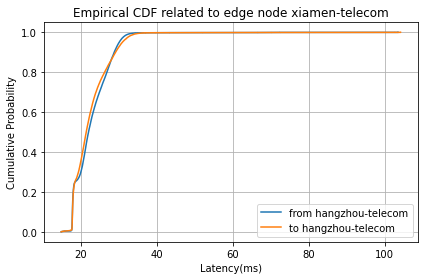

In [80]:
# compare the difference of A -> B and B->A rtt values
dc_ids = ['shanghai-telecom', 'wuxi-telecom_unicom_cmcc', 'suzhou-telecom', 'wuhan-telecom', 'xiamen-telecom']
region_ids = ['shanghai-telecom-2', 'wuxi-telecom-2', 'suzhou-telecom-2', 'wuhan-telecom-3', 'xiamen-telecom_unicom_cmcc', 'jinan-telecom', 'wuhu-telecom', 'qingdao-telecom', 'wenzhou-telecom', 'hangzhou-telecom']


for dc_site_id in dc_ids:
    df_test_to = pd.read_csv(DATASET_LOCATION.rstrip("/") + "/split-rtt-files/{}.csv".format(dc_site_id))
    df_test_from = pd.read_csv(DATASET_LOCATION.rstrip("/") + "/split-rtt-files/{}.csv".format(dc_site_id))
    df_test_to = df_test_to[df_test_to["to_site_id"]==dc_site_id]
    df_test_from = df_test_from[df_test_from["from_site_id"]==dc_site_id]
    df_test_to["biz_ts"] = pd.to_datetime(df_test_to['biz_ts'], unit='s', utc=True)
    df_test_from["biz_ts"] = pd.to_datetime(df_test_from['biz_ts'], unit='s', utc=True)
    df_test_to = df_test_to[df_test_to["rtt"] != 0] # Remove all rows with RTT = 0
    df_test_from = df_test_from[df_test_from["rtt"] != 0] # Remove all rows with RTT = 0
    

    plt.figure(figsize=(10, 6))
    for region_id in region_ids:
        df_region_from = df_test_to[df_test_to["from_site_id"]==region_id]
        df_region_to = df_test_from[df_test_from["to_site_id"]==region_id]
        
        # extract rtt value from region to DC and plot it
        if len(df_region_from) == 0:
            print("{}\t{} has no RTT values".format(dc_site_id, region_id))
        else:
            print("{}\t{}\tmin = {}, max = {}, std = {}, mean = {}".format(dc_site_id, region_id, df_region_from["rtt"].min(), df_region_from["rtt"].max(), df_region_from["rtt"].std(), df_region_from["rtt"].mean()))
            
            rtt_from = np.array(df_region_from["rtt"])
            sorted_rtt_from = np.sort(rtt_from)
            print(sorted_rtt_from, len(sorted_rtt_from))
            ecdf = np.arange(1, len(sorted_rtt_from) + 1) / len(sorted_rtt_from)
            plt.step(sorted_rtt_from, ecdf, where='post', label="from {}".format(region_id))
            
        # extract rtt value from DC to region and plot it
        if len(df_region_to) == 0:
            print("{}\t{} has no RTT values".format(region_id, dc_site_id))
        else:
            print("{}\t{}\tmin = {}, max = {}, std = {}, mean = {}".format(dc_site_id, region_id, df_region_to["rtt"].min(), df_region_to["rtt"].max(), df_region_to["rtt"].std(), df_region_to["rtt"].mean()))
            
            rtt_to = np.array(df_region_to["rtt"])
            sorted_rtt_to = np.sort(rtt_to)
            print(sorted_rtt_to, len(sorted_rtt_to))
            ecdf = np.arange(1, len(sorted_rtt_to) + 1) / len(sorted_rtt_to)
            plt.step(sorted_rtt_to, ecdf, where='post', label="to {}".format(region_id))
            
        
        plt.xlabel('Latency(ms)')
        plt.ylabel('Cumulative Probability')
        plt.title('Empirical CDF related to edge node {}'.format(dc_site_id))
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    